In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [2]:
import numpy as np #librería numérica
import matplotlib.pyplot as plt #para crear gráficos con matplotlib
from sklearn.linear_model import LinearRegression #Regresión lineal con scikit-learn
import pandas as pd

### Coeficientes de Correlación

In [3]:
data = {
        'Calificaciones': [90, 85, 60, 70, 50],
        'Tiempo de Estudio (horas)': [10, 9, 5, 3, 2]
}

df = pd.DataFrame(data)
df

,Calificaciones,Tiempo de Estudio (horas)
0,90,10
1,85,9
2,60,5
3,70,3
4,50,2


In [4]:
correlacion_pearson = df['Calificaciones'].corr(df['Tiempo de Estudio (horas)'])
print(f'Coeficiente de Pearson (r): {correlacion_pearson}')

Coeficiente de Pearson (r): 0.9055509357224758


In [5]:
correlacion_spearman = df['Calificaciones'].corr(df['Tiempo de Estudio (horas)'], method= 'spearman')
print(f'Coeficiente de Spearman (p): {correlacion_spearman}')

Coeficiente de Spearman (p): 0.8999999999999998


### Regresión Lineal

In [9]:
import statsmodels.api as sm

In [10]:
#Data de ejemplo
data = {
        'Tamaño': [1500, 2000, 1200, 1800, 2500, 1400],
        'Habitaciones': [3, 4, 2, 4, 5, 3],
        'Distancia_Ciudad': [5, 3, 10, 2, 8, 12],
        'Precio_Casa': [250000, 320000, 200000, 350000, 420000, 180000]
}

df = pd.DataFrame(data)

#Añadir una constante (intercepto) al modelo
X = sm.add_constant(df[['Tamaño', 'Habitaciones', 'Distancia_Ciudad']])

#Ajustar el modelo de regresión lineal
model = sm.OLS(df['Precio_Casa'], X).fit()

#Obtener resumen de estadisticas del modelo
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            Precio_Casa   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     9.755
Date:                Tue, 26 Mar 2024   Prob (F-statistic):             0.0944
Time:                        04:02:13   Log-Likelihood:                -68.353
No. Observations:                   6   AIC:                             144.7
Df Residuals:                       2   BIC:                             143.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.719e+04   8.28e+04  

C:\Users\Rodrigo\anaconda3\envs\PR_NE\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Usando libreria SKLearn

Text(0.5, 1.0, 'Datos')

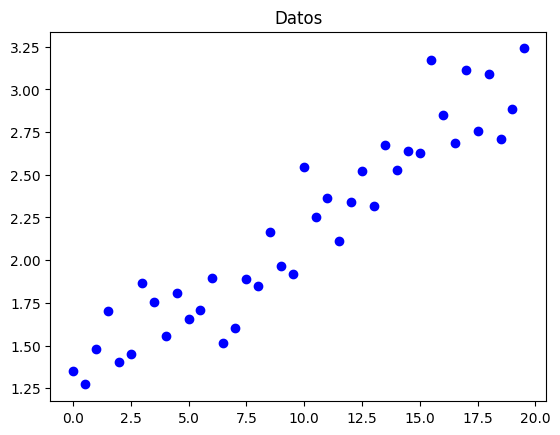

In [16]:
# función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
def f(x):
    np.random.seed(42)
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y
# generamos valores x de 0 a 20 en intervalos de 0.5
x = np.arange(0, 20, 0.5)

# calculamos y a partir de la función que hemos generado
y = f(x)

# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')

In [17]:
#importamos la clase de Regresion Lineal de scikit-learn

from sklearn.linear_model import LinearRegression

# creamos una instancia de LinearRegression
regresion_lineal = LinearRegression() 

# instruimos a la regresion lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)

# vemos los parámetros que ha estimado la regresión lineal
print ('w = ' + str(regresion_lineal.coef_) + ', b ='
+ str(regresion_lineal.intercept_))

w = [0.09183522], b =1.2858792525736682


In [19]:
# vamos a predecir y = regresion_lineal(5)

nuevo_x = np.array([5])
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))

print(prediccion)

[1.74505534]


In [22]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# Calculamos el Error Cuadrático Medio (MSE= Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)

print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 0.03318522012927899
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093


In [23]:
# calculamos el coeficiente de determinación r2

r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' +str(r2))

Coeficiente de Determinación R2 = 0.8943593637683117


Text(0.5, 1.0, 'Datos')

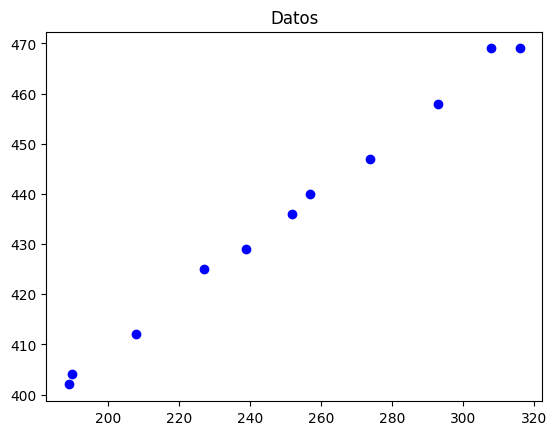

In [30]:
x = np.array([189, 190, 208, 227, 239, 252, 257, 274, 293, 308, 316])
y = np.array([402, 404, 412, 425, 429, 436, 440, 447, 458, 469, 469])

plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')